In [1]:
import pandas as pd


df = pd.read_csv("grocery_chain_data.csv")  # Kaggle
df.head()


,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points
0,2824,GreenGrocer Plaza,2023-08-26,Produce,Pasta,2.0,7.46,14.92,0.00,14.92,377
1,5506,ValuePlus Market,2024-02-13,Dairy,Cheese,1.0,1.85,1.85,3.41,-1.56,111
2,4657,ValuePlus Market,2023-11-23,Bakery,Onions,4.0,7.38,29.52,4.04,25.48,301
3,2679,SuperSave Central,2025-01-13,Snacks & Candy,Cereal,3.0,5.50,16.50,1.37,15.13,490
4,9935,GreenGrocer Plaza,2023-10-13,Canned Goods,Orange Juice,5.0,8.66,43.30,1.50,41.80,22


In [ ]:
#Feature Engineering
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("grocery_chain_data.csv")

# transform date to date type
df['transaction_date'] = pd.to_datetime(df['transaction_date'])


df['day_of_week'] = df['transaction_date'].dt.dayofweek
df['month'] = df['transaction_date'].dt.month
df['year'] = df['transaction_date'].dt.year

#add weekend
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


df.head()


,customer_id,store_name,transaction_date,aisle,product_name,quantity,unit_price,total_amount,discount_amount,final_amount,loyalty_points,day_of_week,month,year,is_weekend
0,2824,GreenGrocer Plaza,2023-08-26,Produce,Pasta,2.0,7.46,14.92,0.00,14.92,377,5,8,2023,1
1,5506,ValuePlus Market,2024-02-13,Dairy,Cheese,1.0,1.85,1.85,3.41,-1.56,111,1,2,2024,0
2,4657,ValuePlus Market,2023-11-23,Bakery,Onions,4.0,7.38,29.52,4.04,25.48,301,3,11,2023,0
3,2679,SuperSave Central,2025-01-13,Snacks & Candy,Cereal,3.0,5.50,16.50,1.37,15.13,490,0,1,2025,0
4,9935,GreenGrocer Plaza,2023-10-13,Canned Goods,Orange Juice,5.0,8.66,43.30,1.50,41.80,22,4,10,2023,0


In [7]:
features = [
    'unit_price',
    'discount_amount',
    'day_of_week',
    'is_weekend',
    'month',
    'year'
]


In [8]:
# Features input
X = df[['unit_price', 'discount_amount', 'month', 'day_of_week', 'year', 'is_weekend']]

# Target suggestion
y = df['quantity']

X.head(), y.head()


(   unit_price  discount_amount  month  day_of_week  year  is_weekend
 0        7.46             0.00      8            5  2023           1
 1        1.85             3.41      2            1  2024           0
 2        7.38             4.04     11            3  2023           0
 3        5.50             1.37      1            0  2025           0
 4        8.66             1.50     10            4  2023           0,
 0    2.0
 1    1.0
 2    4.0
 3    3.0
 4    5.0
 Name: quantity, dtype: float64)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [10]:
X_train.shape, X_test.shape


((1584, 6), (396, 6))

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)


In [12]:
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [13]:
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(0.9611868686868686, 0.25021553699315235)

In [15]:
product_avg_sales = (
    df.groupby('product_name')['quantity']
      .mean()
      .rename('avg_product_sales')
)

df = df.merge(product_avg_sales, on='product_name')


In [17]:
X = df[[
    'unit_price',
    'discount_amount',
    'month',
    'day_of_week',
    'year',
    'is_weekend',
    'avg_product_sales'
]]

y = df['quantity']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(0.9676767676767678, 0.2541979477343249)

In [21]:
product_name = 'Pasta'

product_df = df[df['product_name'] == product_name]


In [22]:
daily_sales = (
    product_df
    .groupby('transaction_date')['quantity']
    .sum()
    .reset_index()
)


In [23]:
daily_sales = daily_sales.sort_values('transaction_date')
daily_sales.head()


,transaction_date,quantity
0,2023-08-07,1.0
1,2023-08-24,3.0
2,2023-08-26,2.0
3,2023-09-11,2.0
4,2023-09-15,5.0


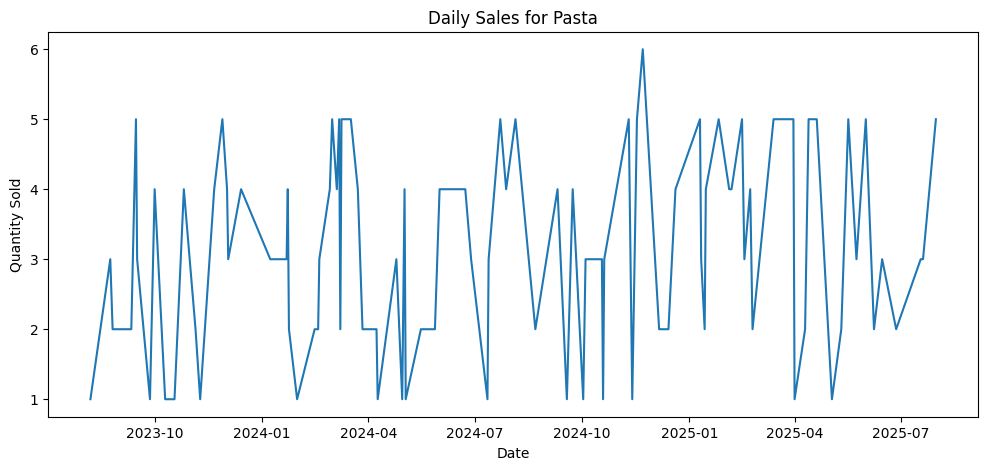

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily_sales['transaction_date'], daily_sales['quantity'])
plt.title("Daily Sales for Pasta")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.show()


In [25]:
#Feature Engineering

daily_sales['month'] = daily_sales['transaction_date'].dt.month
daily_sales['day_of_week'] = daily_sales['transaction_date'].dt.dayofweek
daily_sales['year'] = daily_sales['transaction_date'].dt.year
daily_sales.head()


,transaction_date,quantity,month,day_of_week,year
0,2023-08-07,1.0,8,0,2023
1,2023-08-24,3.0,8,3,2023
2,2023-08-26,2.0,8,5,2023
3,2023-09-11,2.0,9,0,2023
4,2023-09-15,5.0,9,4,2023


In [26]:
X = daily_sales[['month', 'day_of_week', 'year']]
y = daily_sales['quantity']


In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [29]:
# test data
y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2: 0.25541563256916167
MAE: 0.9652020202020203


In [ ]:
# lag1 > yesterday sales, lag7 > a week ago sales, lag30 > a month ago sales
daily_sales['lag_1'] = daily_sales['quantity'].shift(1)
daily_sales['lag_7'] = daily_sales['quantity'].shift(7)
daily_sales['lag_30'] = daily_sales['quantity'].shift(30)

daily_sales = daily_sales.dropna()
daily_sales.head()


,transaction_date,quantity,month,day_of_week,year,lag_1,lag_7,lag_30
30,2024-03-08,2.0,3,4,2024,5.0,2.0,1.0
31,2024-03-09,5.0,3,5,2024,2.0,2.0,3.0
32,2024-03-17,5.0,3,6,2024,5.0,3.0,2.0
33,2024-03-23,4.0,3,5,2024,5.0,4.0,2.0
34,2024-03-27,2.0,3,2,2024,4.0,5.0,5.0


In [32]:
split_index = int(len(daily_sales)*0.8)
train = daily_sales.iloc[:split_index]
test = daily_sales.iloc[split_index:]

X_train = train[['month','day_of_week','year','lag_1','lag_7','lag_30']]
y_train = train['quantity']

X_test = test[['month','day_of_week','year','lag_1','lag_7','lag_30']]
y_test = test['quantity']


In [33]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2: -0.09358243626062346
MAE: 1.2207142857142854


In [ ]:
# the problem is because the data is not enough for training >> data quality problem
# New datasets was installed 

In [34]:
import pandas as pd

# new datasets path
df = pd.read_csv(r"E:\Sales-data-analysis\Datasets\train.csv")

# transfer date 
df['date'] = pd.to_datetime(df['date'])

#date features 
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['year'] = df['date'].dt.year

df.head()


,date,store,item,sales,day,month,day_of_week,year
0,2013-01-01,1,1,13,1,1,1,2013
1,2013-01-02,1,1,11,2,1,2,2013
2,2013-01-03,1,1,14,3,1,3,2013
3,2013-01-04,1,1,13,4,1,4,2013
4,2013-01-05,1,1,10,5,1,5,2013


In [35]:
#choose store & product or item
store_id = 1
item_id = 1

df_filtered = df[(df['store'] == store_id) & (df['item'] == item_id)]
df_filtered.head()


,date,store,item,sales,day,month,day_of_week,year
0,2013-01-01,1,1,13,1,1,1,2013
1,2013-01-02,1,1,11,2,1,2,2013
2,2013-01-03,1,1,14,3,1,3,2013
3,2013-01-04,1,1,13,4,1,4,2013
4,2013-01-05,1,1,10,5,1,5,2013


In [36]:
# collect monthly
monthly_sales = df_filtered.groupby(['year','month'])['sales'].sum().reset_index()

# Merg year and month at the same date 
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

monthly_sales = monthly_sales.sort_values('date')
monthly_sales.head()


,year,month,sales,date
0,2013,1,328,2013-01-01
1,2013,2,322,2013-02-01
2,2013,3,477,2013-03-01
3,2013,4,522,2013-04-01
4,2013,5,531,2013-05-01


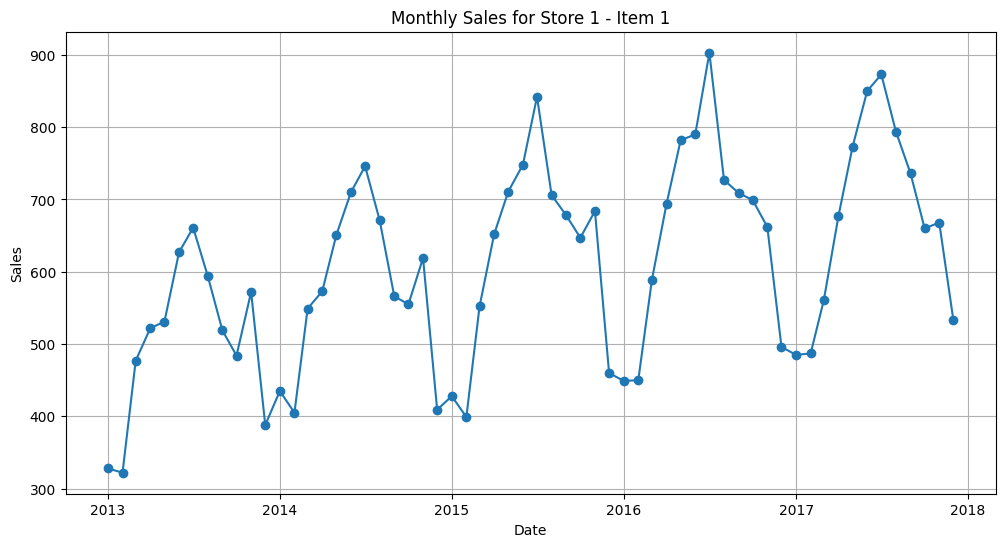

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['date'], monthly_sales['sales'], marker='o')
plt.title(f"Monthly Sales for Store {store_id} - Item {item_id}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split

monthly_sales = monthly_sales.sort_values('date').reset_index(drop=True)

# Feature: last sales
monthly_sales['sales_lag1'] = monthly_sales['sales'].shift(1)

# delete the first row cause doesnt contain lag 
monthly_sales = monthly_sales.dropna().reset_index(drop=True)

# Features & target
X = monthly_sales[['sales_lag1']]
y = monthly_sales['sales']

X.head(), y.head()


(   sales_lag1
 0       328.0
 1       322.0
 2       477.0
 3       522.0
 4       531.0,
 0    322
 1    477
 2    522
 3    531
 4    627
 Name: sales, dtype: int64)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# create model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# rating
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2: {r2}")
print(f"MAE: {mae}")


R2: -0.06997875354107652
MAE: 1.1978571428571427


In [ ]:
  # create lag features lag1 a month ago sales, lag2 2 months ago sales, lag 3  months ago sales
sales_ts = monthly_sales.copy()

sales_ts['lag1'] = sales_ts['sales'].shift(1)
sales_ts['lag2'] = sales_ts['sales'].shift(2)
sales_ts['lag3'] = sales_ts['sales'].shift(3)

sales_ts.dropna(inplace=True)
sales_ts.head()



,year,month,sales,date,sales_lag1,lag1,lag2,lag3
3,2013,5,531,2013-05-01,522.0,522.0,477.0,322.0
4,2013,6,627,2013-06-01,531.0,531.0,522.0,477.0
5,2013,7,661,2013-07-01,627.0,627.0,531.0,522.0
6,2013,8,594,2013-08-01,661.0,661.0,627.0,531.0
7,2013,9,519,2013-09-01,594.0,594.0,661.0,627.0


In [43]:
sales_ts = sales_ts.drop(columns=['sales_lag1'])


In [44]:
sales_ts.columns


Index(['year', 'month', 'sales', 'date', 'lag1', 'lag2', 'lag3'], dtype='object')

In [45]:
X = sales_ts[['lag1', 'lag2', 'lag3', 'month', 'year']]
y = sales_ts['sales']

X.head(), y.head()


(    lag1   lag2   lag3  month  year
 3  522.0  477.0  322.0      5  2013
 4  531.0  522.0  477.0      6  2013
 5  627.0  531.0  522.0      7  2013
 6  661.0  627.0  531.0      8  2013
 7  594.0  661.0  627.0      9  2013,
 3    531
 4    627
 5    661
 6    594
 7    519
 Name: sales, dtype: int64)

In [46]:
# tain percent %80
split_index = int(len(X) * 0.8)

# divide the data %80 past for training and %20 future for testing
X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

X_train.shape, X_test.shape


((44, 5), (12, 5))

In [47]:
from sklearn.ensemble import RandomForestRegressor

# create model
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

# train model
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [48]:
y_pred = model.predict(X_test)
y_pred[:5]


array([466.   , 454.385, 542.845, 595.205, 695.015])

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2:", r2)
print("MAE:", mae)


R2: 0.8781940126238741
MAE: 37.86374999999999


In [ ]:
# now we make a model to predict the total sales of the company
# Time Series Forecasting (Enterprise Level)

In [51]:
monthly_sales = df.groupby(pd.Grouper(key='date', freq='M'))['sales'].sum().reset_index()
monthly_sales.head()


C:\Users\pc\AppData\Local\Temp\ipykernel_15400\2745964978.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='date', freq='M'))['sales'].sum().reset_index()


,date,sales
0,2013-01-31,454904
1,2013-02-28,459417
2,2013-03-31,617382
3,2013-04-30,682274
4,2013-05-31,763242


In [52]:
# create lag features lag1 a month ago sales, lag2 2 months ago sales, lag 3 months ago sales
sales_ts = monthly_sales.copy()

sales_ts['lag1'] = sales_ts['sales'].shift(1)
sales_ts['lag2'] = sales_ts['sales'].shift(2)
sales_ts['lag3'] = sales_ts['sales'].shift(3)

sales_ts.head(10)


,date,sales,lag1,lag2,lag3
0,2013-01-31,454904,NaN,NaN,NaN
1,2013-02-28,459417,454904.0,NaN,NaN
2,2013-03-31,617382,459417.0,454904.0,NaN
3,2013-04-30,682274,617382.0,459417.0,454904.0
4,2013-05-31,763242,682274.0,617382.0,459417.0
5,2013-06-30,795597,763242.0,682274.0,617382.0
6,2013-07-31,855922,795597.0,763242.0,682274.0
7,2013-08-31,766761,855922.0,795597.0,763242.0
8,2013-09-30,689907,766761.0,855922.0,795597.0
9,2013-10-31,656587,689907.0,766761.0,855922.0


In [53]:
# delete lag rows
sales_ts.dropna(inplace=True)
sales_ts.head()


,date,sales,lag1,lag2,lag3
3,2013-04-30,682274,617382.0,459417.0,454904.0
4,2013-05-31,763242,682274.0,617382.0,459417.0
5,2013-06-30,795597,763242.0,682274.0,617382.0
6,2013-07-31,855922,795597.0,763242.0,682274.0
7,2013-08-31,766761,855922.0,795597.0,763242.0


In [57]:
# make sure the column date is datetime type
sales_ts['date'] = pd.to_datetime(sales_ts['date'])

# extract month and year
sales_ts['month'] = sales_ts['date'].dt.month
sales_ts['year'] = sales_ts['date'].dt.year


In [58]:
# (features) = lag1, lag2, lag3,
X = sales_ts[['lag1', 'lag2', 'lag3', 'month', 'year']]

#(target) = now sales
y = sales_ts['sales']


In [60]:
# %80 train %20 test
split_index = int(len(X) * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
X_train.shape, X_test.shape



((45, 5), (12, 5))

In [61]:
from sklearn.ensemble import RandomForestRegressor

# create model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# train model
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [62]:
# predict sales for the last 12 months
y_pred = model.predict(X_test)
y_pred


array([ 636248.935,  625273.045,  676105.805,  895814.085,  975756.64 ,
       1043784.71 , 1056758.73 ,  966150.55 ,  929374.415,  891707.185,
        859447.27 ,  824168.995])

In [63]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2:", r2)
print("MAE:", mae)


R2: 0.8105685177405475
MAE: 54827.996250000004


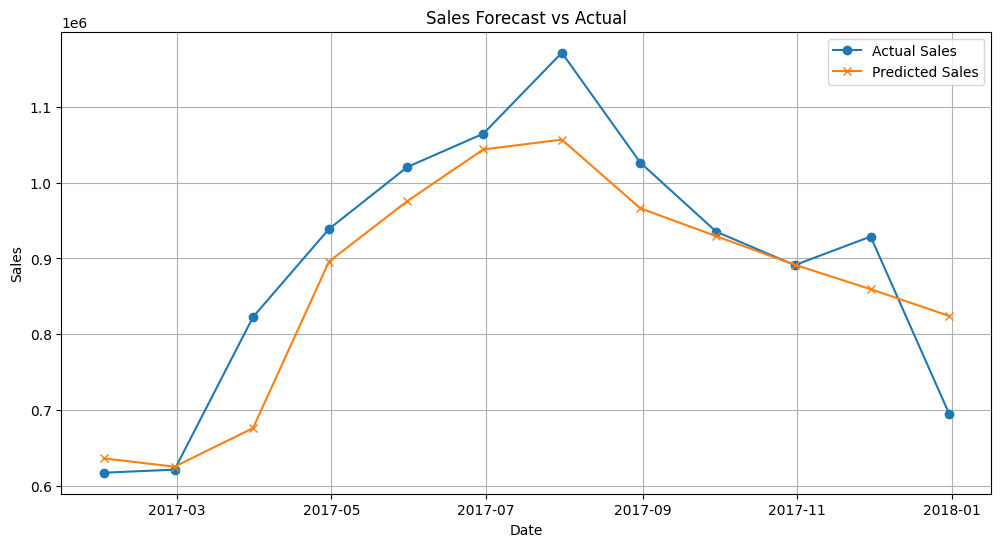

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sales_ts['date'][split_index:], y_test, label='Actual Sales', marker='o')
plt.plot(sales_ts['date'][split_index:], y_pred, label='Predicted Sales', marker='x')
plt.title('Sales Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [67]:
import joblib

#save the model
joblib.dump(model, "market_sales_prediction.pkl")  


['market_sales_prediction.pkl']